### Base MENDELEY 
> A dataset for microscopic peripheral blood cell images for development of automatic recognition systems

In [1]:
import gdown 
url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/snkd93bnjr-1.zip'
# Windows
#!mkdir ..\images_mendeley
!mkdir ../images_mendeley
src_img = '../images_mendeley/'

In [2]:
gdown.download(url, src_img+'images.zip',quiet=False)

Downloading...
From: https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/snkd93bnjr-1.zip
To: C:\Users\LAURE\Documents\Perso\FORMATION\DATASCIENTEST\Projet\Blood Cell\Github\images_mendeley\images.7z
100%|██████████| 279M/279M [02:12<00:00, 2.10MB/s] 


'../images_mendeley/images.7z'

In [10]:
!7z x ../images_mendeley/images.zip -o../images_mendeley/


7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive for archives:
1 file, 278867153 bytes (266 MiB)

Extracting archive: ..\images_mendeley\images.zip
--
Path = ..\images_mendeley\images.zip
Type = zip
Physical Size = 278867153

Everything is Ok

Size:       281366219
Compressed: 278867153


In [11]:
!7z x ../images_mendeley/PBC_dataset_normal_DIB.zip -o../images_mendeley/


7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive for archives:
1 file, 281366219 bytes (269 MiB)

Extracting archive: ..\images_mendeley\PBC_dataset_normal_DIB.zip
--
Path = ..\images_mendeley\PBC_dataset_normal_DIB.zip
Type = zip
Physical Size = 281366219

Everything is Ok

Folders: 9
Files: 17113
Size:       281244394
Compressed: 281366219


In [15]:
# Windows
# !del ..\images_mendeley\images.zip
# !del ..\images_mendeley\PBC_dataset_normal_DIB.zip
# Linux
!rm ../images_mendeley/images.zip
!rm ../images_mendeley/PBC_dataset_normal_DIB.zip

In [24]:
img_dir = "../images_mendeley/PBC_dataset_normal_DIB/"
type_cells =  ['basophil','eosinophil','erythroblast','ig','lymphocyte','monocyte','neutrophil','platelet']

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
import cv2
sns.set_theme() 

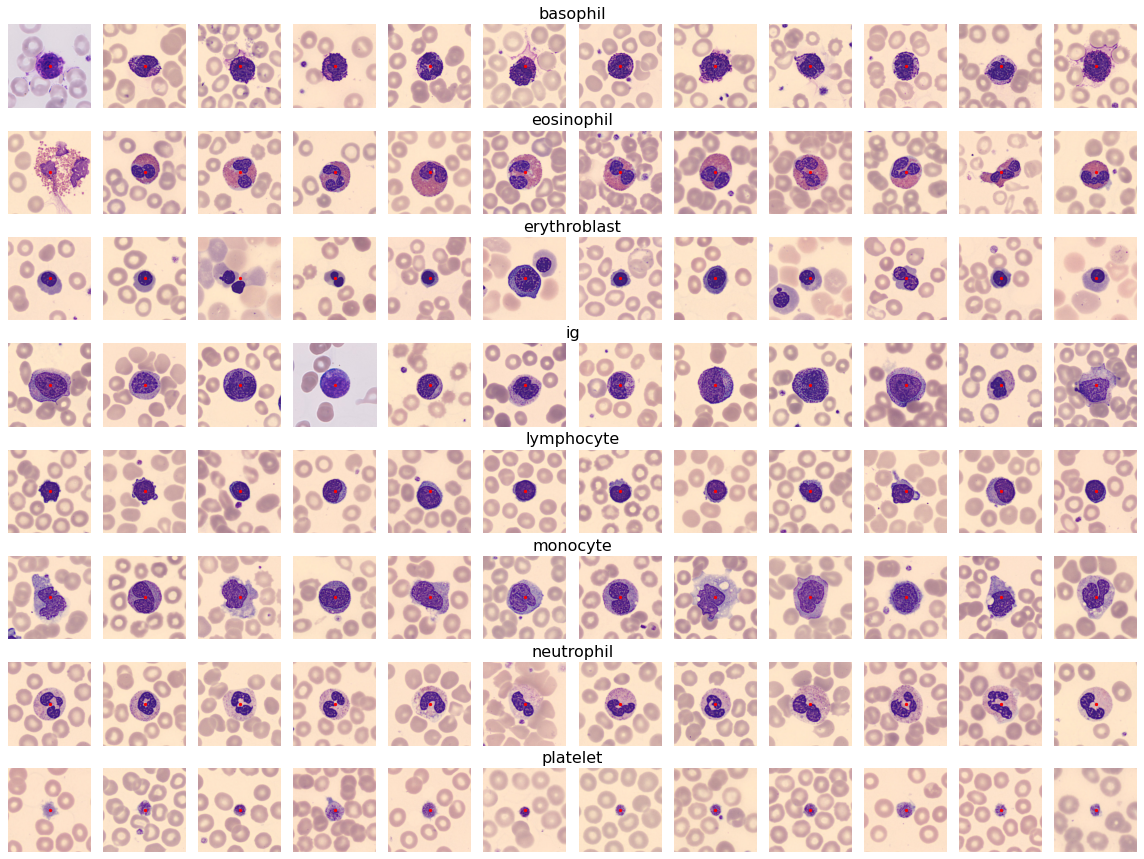

In [25]:
#Visualisation des différentes types de cellules : 12 images par type (8 types)
num_rows = 8
num_cols = 12
fig, big_axes = plt.subplots( figsize=(16, 12) , nrows=num_rows, ncols=1, sharey=True) 
# Division du graphique en lignes par type
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f"{type_cells[row-1]}", fontsize=16)
    big_ax.axis('off');
    big_ax._frameon = False
# Pour chaque type, affichage en colonne des différentes images
i=1
for type_cell in type_cells:
    ##12 fichiers aléatoires de chaque type
    files = os.listdir(img_dir+type_cell)
    files_select =  [files[i] for i in np.random.randint(0,len(files),num_cols)]
    for file in files_select:
        ax = fig.add_subplot(num_rows,num_cols,i)
        img = plt.imread(img_dir+type_cell+'/'+file) 
        ax.imshow(img)
        #Point central de l'image
        plt.scatter(int(img.shape[0]/2),int(img.shape[1]/2), color='red',s=5)
        plt.axis('off');
        i+=1

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

> Nous visualisons que les données qui nous intéressent sur chaque image se trouve toujours au centre de l'image (point rouge)
>
> On remarque également que certains types semblent plus facilement identifiable :
> - platelet : cellules plus petites ( pas de biais, car les xxxx environnantes sont de mêmes tailles que sur les autres)
> - eosynophil, neutrophil : plusieurs noyaux (parties en violet foncé)
>
> Les ronds grisés tout autour correspondent aux globules rouges
>
> Certaines images sont plus claires que les autres, biais?

In [31]:
#Création du dataframe : enregistrement des informations path, fichier, label, size 
# Enregistre seulement le chemin de l'image et non la matrice, car taille de l'image trop importante, à voir si réduction de dimensions ensuite
col_file_path=[]
col_filename=[]
col_type_cell=[]
col_size_img=[]
for type_cell in type_cells:
    #Pour chaque fichier du sous répertoire
    for file in os.listdir(img_dir+type_cell):
        if file.endswith(".jpg") and not file.startswith("."):
            path_filename = img_dir+type_cell+'/'+file
            img = plt.imread(path_filename)
            col_file_path.append(path_filename)
            col_filename.append(file)
            col_type_cell.append(type_cell)
            col_size_img.append(str(img.shape[0])+'x'+str(img.shape[1]))
#Création du DataFrame
df_cells = pd.DataFrame({'file_path':col_file_path,'filename':col_filename,'class':col_type_cell,'size':col_size_img})

In [32]:
df_cells.head()

file_path       filename     class  \
0  ../images_mendeley/PBC_dataset_normal_DIB/baso...  BA_100102.jpg  basophil   
1  ../images_mendeley/PBC_dataset_normal_DIB/baso...  BA_101381.jpg  basophil   
2  ../images_mendeley/PBC_dataset_normal_DIB/baso...  BA_101611.jpg  basophil   
3  ../images_mendeley/PBC_dataset_normal_DIB/baso...  BA_102039.jpg  basophil   
4  ../images_mendeley/PBC_dataset_normal_DIB/baso...  BA_102750.jpg  basophil   

      size  
0  363x360  
1  363x360  
2  363x360  
3  363x360  
4  363x360

In [33]:
#Sauvegarde du dataframe dans un fichier csv 
df_cells.to_csv("../base_mendeley.csv")

### ETUDE DES IMAGES

In [36]:
#Chargement du fichier de données 
df_cells = pd.read_csv("../base_mendeley.csv")

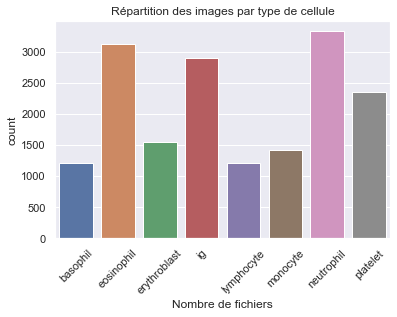

In [39]:
#Visualisation de la répartition des images des cellules par type
sns.countplot(x = df_cells['class'])
plt.title("Répartition des images par type de cellule")
plt.xlabel('Type de cellules sanguine')
plt.xlabel('Nombre de fichiers')
plt.xticks(rotation=45);

> La répartition ne correspond pas à la répartition des cellules dans un échantillon sanguin
>
> Un peu plus de 17000 images disponibles. Quantité suffisante? 
>
> Besoin d'augmentation des données selon le modèle?

#### FORMAT DES IMAGES

In [41]:
#Taille des images
df_cells['size'].value_counts()

363x360    16639
369x366      250
360x360      198
361x360        2
360x362        1
360x359        1
360x361        1
Name: size, dtype: int64

> Toutes les images sont en couleurs, la quasi totalité format 363*360, mais quelques images format différents
>
> Visualisation des images 369x366 et 360x360=> voir si biais
>
> 5 images autres formats => à supprimer ? Ou remettre au même format ?

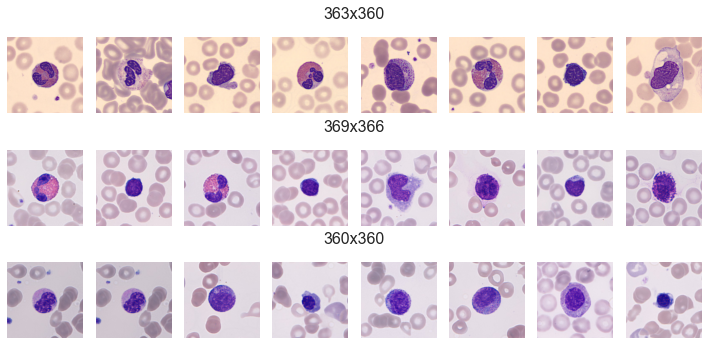

In [42]:
#Visualisation des images 369*366 et 360*360=> voir si biais
sizes = ['363x360','369x366','360x360']
num_rows = 3
num_cols = 8
fig, big_axes = plt.subplots( figsize=(10, 5) , nrows=num_rows, ncols=1, sharey=True) 
# Division du graphique : chaque ligne correspond à un format d'image
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f"{sizes[row-1]}", fontsize=16)
    big_ax.axis('off');
    big_ax._frameon = False
# Pour chaque ligne, affichage de plusieurs images en colonne
i=1
for size in sizes:
    # images de ce format
    images = df_cells[df_cells['size']==size]
    for index in np.random.choice(images.index,num_cols):
        ax = fig.add_subplot(num_rows,num_cols,i)
        img = plt.imread(images.loc[index]['file_path']) 
        ax.imshow(img)
        plt.axis('off');
        i+=1

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

> On remarque que les images au format 369x366 et 360x360 n'ont pas la même luminosité que les autres

In [43]:
# Vérification des types de cellules ayant une exposition différente , quels types de cellules?
df_diff = df_cells[(df_cells['size']=='369x366') | (df_cells['size']=='360x360')]
df_diff['class'].value_counts()

ig              147
erythroblast     51
basophil         50
eosinophil       50
lymphocyte       50
monocyte         50
neutrophil       50
Name: class, dtype: int64

> Presque toutes les types de cellules sont concernés par des images avec luminosité différente, mais faible nombre d'occurences

**Recherche de doublons dans les images**

In [54]:
#Vérification si augmentation de données : images dupliquées
#Vérification si doublon en récupérant la distribution des nuances de gris sur chaque image
lst_hist=[]
i=0
for type_cell in type_cells:
    #Pour chaque fichier du sous répertoire
    for file in os.listdir(img_dir+type_cell):
        path_filename = img_dir+type_cell+'/'+file
        if file.endswith(".jpg") and not file.startswith("."):
            img = cv2.imread(path_filename,0) #Chargement de l'image en gris (une seule couche)
            img_gray = pd.DataFrame(img.flatten(),columns=['color'])
            hist = pd.DataFrame(img_gray.value_counts(),columns=[i]).reset_index().set_index('color')
            lst_hist.append(hist) # Enregistrement de la distribution de l'image
            i+=1

In [55]:
# Mise en forme d'un dataframe pour vérification de doublon
colors = pd.DataFrame(range(256), columns=['color']).set_index('color')
df_colors = colors.join(lst_hist,how='left').fillna(0).T

In [56]:
#Nombre de doublon
df_colors.duplicated().sum()

17

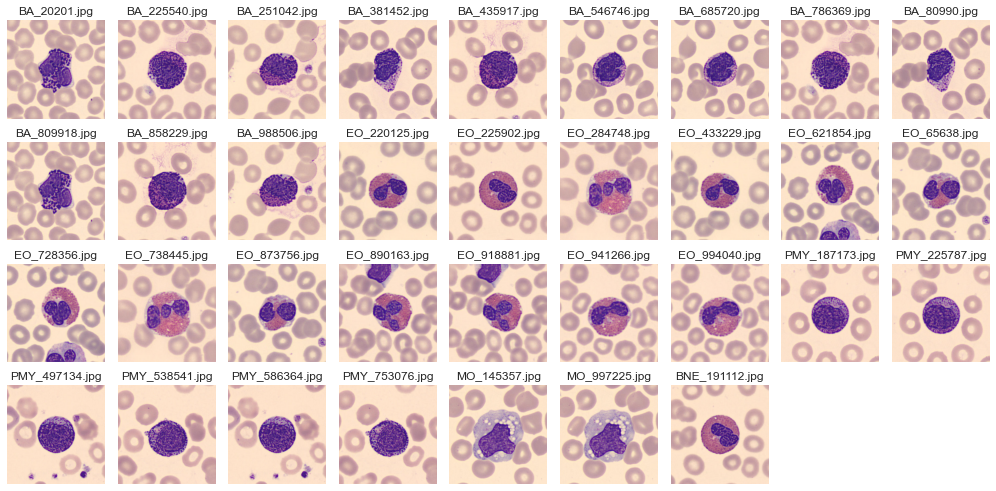

In [57]:
#Affichage des images en doublon
num_rows = 4
num_cols = 9
fig =  plt.figure(figsize=(14, 7) ) 
i=1
for index, row in df_cells[df_colors.duplicated(keep=False)].iterrows():
    # images en doublons
    ax = fig.add_subplot(num_rows,num_cols,i)
    img = plt.imread(row['file_path']) 
    ax.imshow(img)
    ax.set_title(row['filename'])
    plt.axis('off');
    i+=1

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

> Très peu de doublon, aucune rotation d'image => possibilité d'augmenter les données si nécessaire
>
> **MAIS anomalie : Images EO_225902.jpg et BNE_191112.jpg sont identiques mais classées dans 2 classes différentes : Eosinophil et neutrophil => relève une difficulté de classification même par un humain ou erreur de classement?**

#### ETUDE DES HISTOGRAMMES

In [58]:
# Parmi les images 363x360 (16639 images) ayant la même exposition, étude des histogrammes des couleurs
df_cells_select = df_cells[df_cells['size']=='363x360'] # Images de même exposition

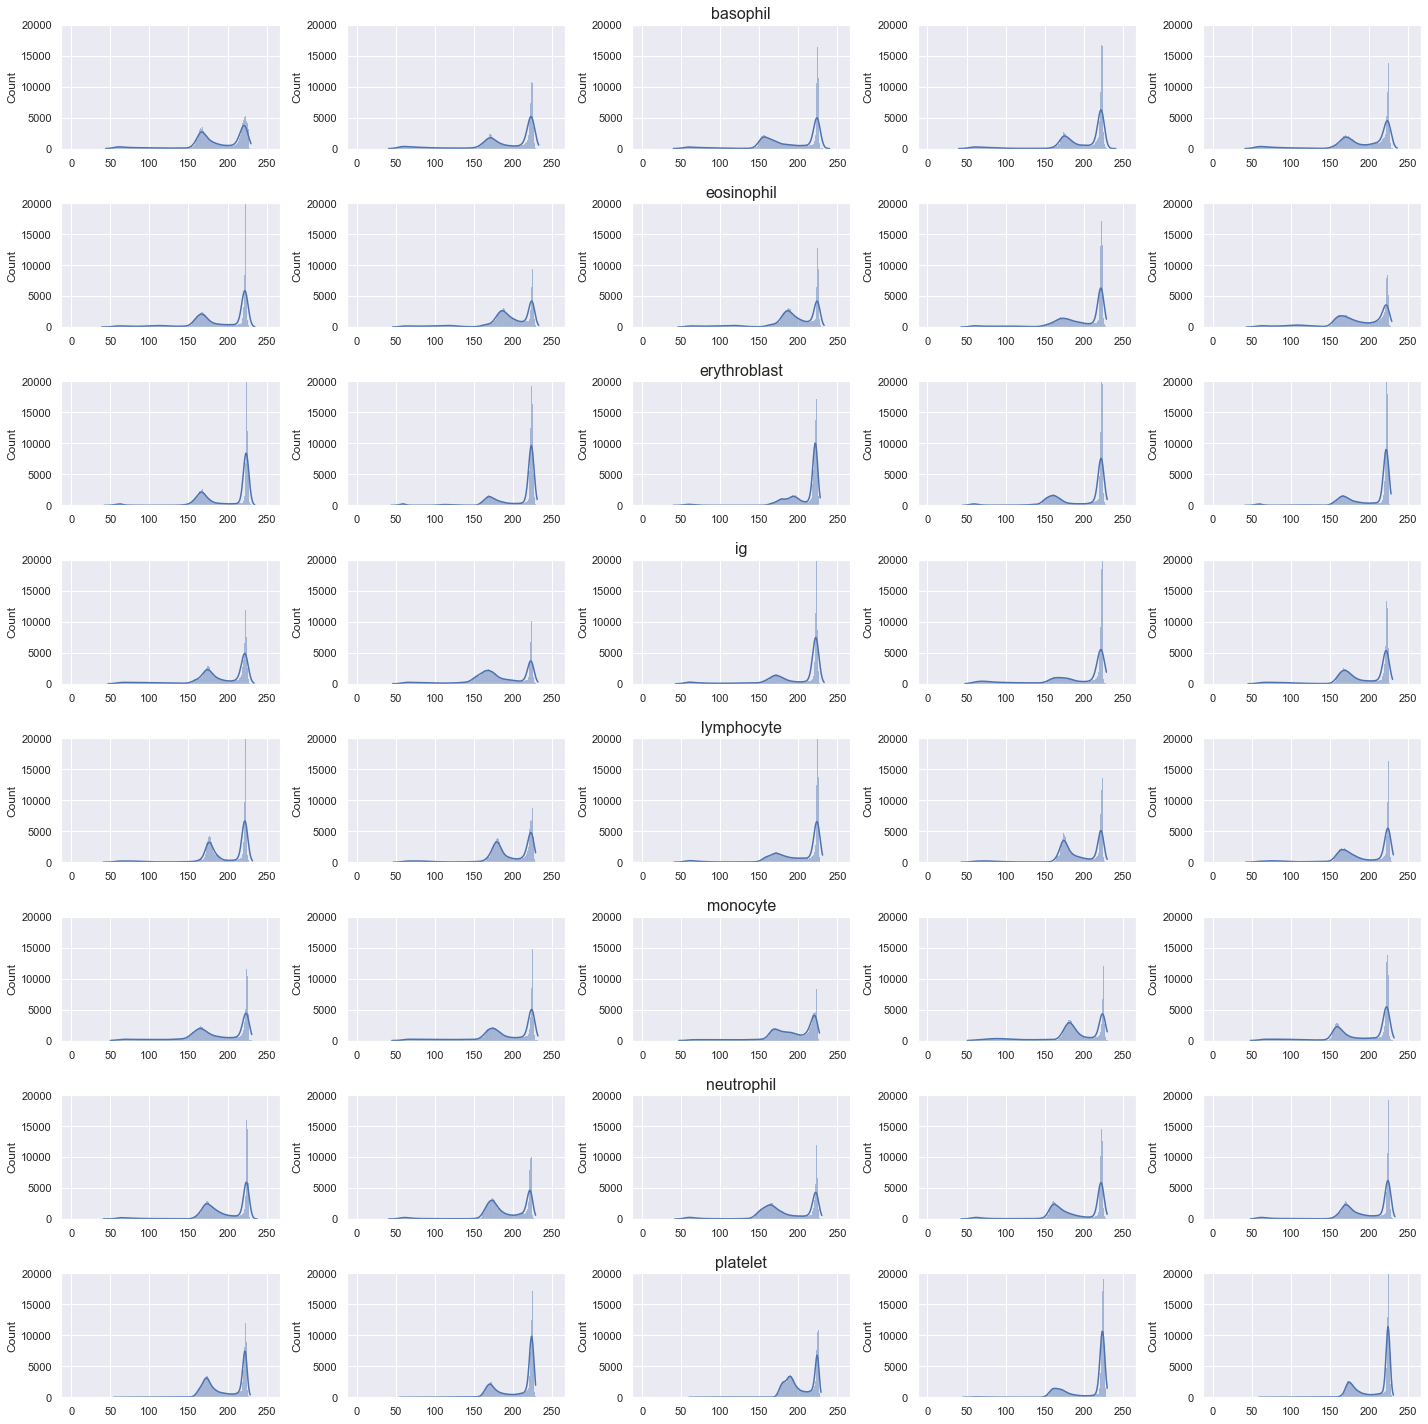

In [61]:
# Affichage des histogrammes par type de cellules : 4 images pris dans chaque type, etude des images en gris
num_rows = 8
num_cols = 5
fig, big_axes = plt.subplots( figsize=(20, 20) , nrows=num_rows, ncols=1, sharey=True) 
# 1 ligne par type de cellule
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f"{type_cells[row-1]}", fontsize=16)
    big_ax.axis('off');
    big_ax._frameon = False

# 4 graphiques
i=1
for type_cell in type_cells:
    # images de ce type
    images = df_cells_select[df_cells_select['class']==type_cell]
    #4 fichiers aléatoires de chaque type
    for index in np.random.choice(images.index,num_cols):
        ax = fig.add_subplot(num_rows,num_cols,i)
        img = plt.imread(images.loc[index]['file_path']) 
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sns.histplot(img_gray.flatten(), bins=range(255),kde=True, ax = ax)
        ax.set(ylim=(0, 20000))
        i+=1
fig.set_facecolor('w')
plt.tight_layout()
plt.show()

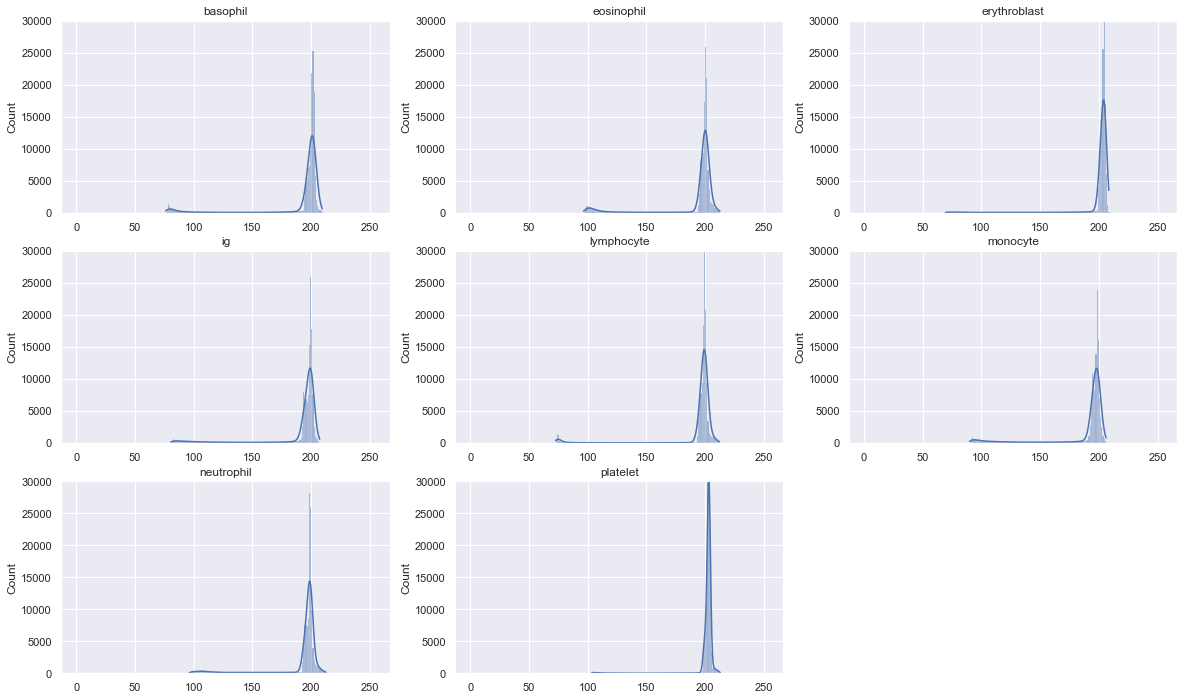

In [107]:
#Uniquement pour les cellules de format 363x360, moyenne des histogrammes voir si une tendance ressort
num_rows = 3
num_cols = 3
fig =  plt.figure(figsize=(20, 12) ) 
i=1
for type_cell in type_cells:
    cells_selected = df_cells_select[df_cells_select['class']==type_cell] 
    img_cells =[]
    for index,cell in cells_selected.iterrows():
        img = plt.imread(cell['file_path']) 
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_cells.append(img_gray)
    img_mean = np.array(img_cells).mean(axis=0)
    # images en doublons
    ax = fig.add_subplot(num_rows,num_cols,i)
    sns.histplot(img_mean.flatten(), bins=range(255),kde=True,ax=ax)
    ax.set_title(type_cell)
    ax.set(ylim=(0, 30000))
    i+=1
plt.show()

> A l'exception des platelets, pas de différence notable permettant d'identifier un type de cellule à partir de l'histogramme
>
>Voir Intérêt de réduire l'image pour limiter les informations non utiles autour de la cellule : resize des images à partir du centre sur du 256*256?
>
>Autre possibilité : détecter le contour de la cellule et supprimer le contenu autour?

**Type de cellules IG, étude de la sous classification basophil, neutrophil, eosinophil**

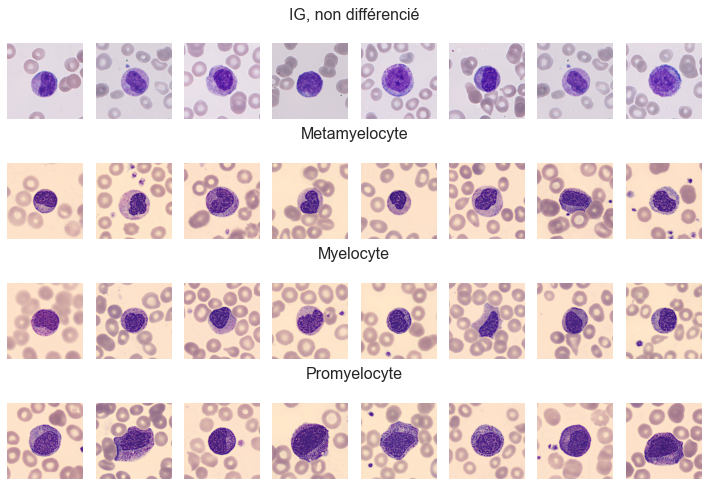

In [109]:
#IG , classification en sous type => intérêt de les regrouper ou répartir dans les classes basophil, neutrophil, eosinophil
# Problème pas d'étiquette correspondant aux classes basophil, neutrophil, eosinophil
# 3 Classes : MMY(metamyelocyte, PMY(promyelocyte) et MY(myelocyte) = différents stades 
# + Images étiquetées IG seuls mais avec luminosité plus faible
IG_class = ['IG','MMY','MY','PMY']
IG_class_desc = ['IG, non différencié','Metamyelocyte','Myelocyte','Promyelocyte']
num_rows = 4
num_cols = 8
fig, big_axes = plt.subplots( figsize=(10, 7) , nrows=num_rows, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title(f"{IG_class_desc[row-1]}", fontsize=16)
    big_ax.axis('off');
    big_ax._frameon = False

i=1
for cl in IG_class:
    # images de ce format
    images =  df_cells[df_cells['filename'].str.startswith(cl) ]
    for index in np.random.choice(images.index,num_cols):
        ax = fig.add_subplot(num_rows,num_cols,i)
        img = plt.imread(images.loc[index]['file_path']) 
        ax.imshow(img)
        plt.axis('off');
        i+=1

fig.set_facecolor('w')
plt.tight_layout()
plt.show()

> La proportion du noyau dans la cellule permet de différencier les différents stades
>
> Problème de granularités du cytoplasme correspond à plusieurs classes : Basophil, Neutrophil, Eosinophil
>
>Image prefixé IG, pas de différenciation Metamyelocyte, Myelocyte, Promyelocyte

**ETUDE DU REDIMENSIONNEMENT des images en 256*256**

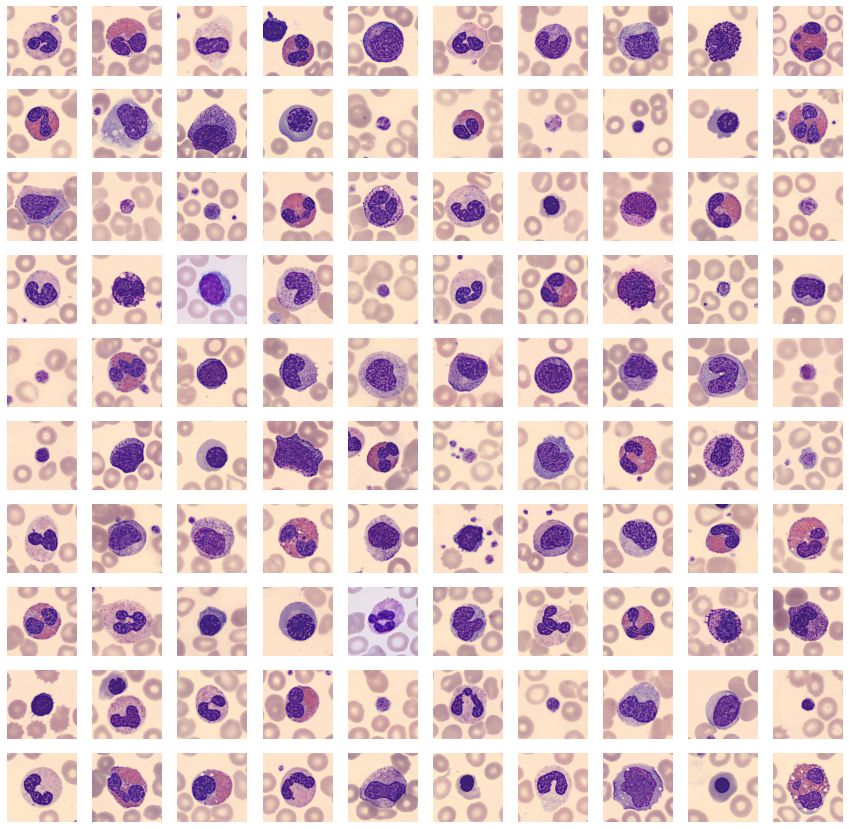

In [110]:
# Etudie en rognant l'image autour du centre => garde bien l'intégralité de la cellule?
# Cela permettrait de réduire la taille de l'image sans perte de données et supprimer potentiellement des données non utiles
num_cols = 10
num_rows = 10 
fig = plt.figure(figsize=(15,15))
i=1
for index in np.random.choice(df_cells.index,num_cols*num_rows):
    ax = fig.add_subplot(num_rows,num_cols,i)
    img = plt.imread(df_cells.loc[index]['file_path']) 
    #Redimensionne en rognant
    x , y  = (int(img.shape[0]/2),int(img.shape[1]/2))
    img_red = img[x-128:x+128,y-128:y+128]
    ax.imshow(img_red)
    plt.axis('off');
    i+=1

> Le découpage des images semblent ne pas impacter les données intéressantes dans l'image: la cellule centrale.
>
> A voir si meilleure prédiction avec ce redécoupage plutôt qu'avec un redimensionnement avec perte de données